# Perceptron

### Download Iris dataset
Follow the link and download the Iris dataset:  
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#from sklearn.linear_model import Perceptron

In [2]:
class Perceptron:

    def __init__(self, alpha=0.0001, max_iter=300):
        self.alpha = alpha
        self.max_iter = max_iter
        self.intercept_ = None
        self.coef_ = None
        self.iter = None

    def fit(self, X, y):
        self.intercept_ = np.random.sample() * self.alpha
        self.coef_ = np.random.sample((len(X.T), 1)) * self.alpha
        y = y.reshape(-1,1)
        self.iter = 0

        while True:
            self.iter += 1
            if self.iter > self.max_iter:
                break

            old_b, old_w = [self.intercept_, self.coef_]
            for i in range(len(X)):
                z = np.dot(X[i], self.coef_) + self.intercept_
                y_cap = self._phi(z)
                delta_b = self.alpha * (y[i] - y_cap)
                delta_w = self.alpha * (y[i] - y_cap) * X[i]
                self.intercept_ += delta_b
                self.coef_ += delta_w.reshape(-1, 1)
            if old_b == self.intercept_ and np.array_equal(old_w, self.coef_):
                break

        return self

    # activation functions
    def _phi(self, z):
        return -1 if z < 0 else 1

    # quantizer
    def predict(self, X):
        a = np.dot(X, self.coef_) + self.intercept_
        return np.where(a < 0, -1, 1).reshape(1,-1)[0]

### Importing data

In [3]:
X = pd.read_csv('datasets/iris.data.csv')
X = X[X['class'].isin(['Iris-setosa', 'Iris-versicolor'])]
X['class'] = np.where(X['class'] == 'Iris-setosa', -1, 1)

### Standardization and slicing

In [4]:
x_fields = ['sepal length', 'petal width']
X[x_fields] = StandardScaler().fit_transform(X[x_fields])
X_train, X_test, y_train, y_test = train_test_split(np.array(X[x_fields]), np.array(X['class']), test_size=0.2)

### Fitting

In [5]:
y_pred = Perceptron().fit(X_train, y_train).predict(X_test)

### Accuracy check

In [6]:
accuracy_score(y_test, y_pred)

1.0

### Scatterplot

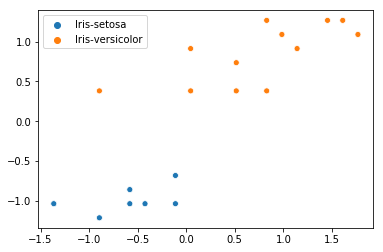

In [7]:
sns.scatterplot(x=X_test.T[0], y=X_test.T[1],
                hue=np.where(y_pred == -1, 'Iris-setosa', 'Iris-versicolor'))